# <center>T- Tests</center> 

**What Is a T-Test?**

A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features. It is mostly used when the data sets, like the data set recorded as the outcome from flipping a coin 100 times, would follow a normal distribution and may have unknown variances. A t-test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population. 


A t-test looks at the t-statistic, the t-distribution values, and the degrees of freedom to determine the statistical significance. To conduct a test with three or more means, one must use an analysis of variance.

Essentially, a t-test allows us to compare the average values of the two data sets and determine if they came from the same population.

$t$-tests are among the most common statistical tests performed in world.

This notebook focuses on the practicalities of performing $t$-tests in Python.

For information about the $t$-test itself, I recommend reading Laerd Statistics's Independent t-test using SPSS Statistics.

https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

### Import Packages

In [1]:
import numpy as np # creates large numerical arrays.
import pandas as pd # Creates dataframes and structures built from Numpy arrays
import statsmodels.stats.weightstats as stat # Stats modles

## Scipy.stats is the only library you need to doa t-test.
import scipy.stats as ss # This module contains a large number of probability distributions as well as a growing library of stat functions
import matplotlib.pyplot as plt # Displays plots
import seaborn as sns # higher level plots, which gives more insight into datasets

plt.style.use("fivethirtyeight") # 538 vis of graphs

**The whole point of this test** is to run a single function in a stats package, that performs something that people spend quite a bit of money on because they don't know how to program, such as SPSS.

This is one of the main lines of code we need to do this test. 

stat.ttest_ind(a, b)

### Importing data for T-Test

#### Fake data values.

- What are your assumptions of running the test?
- How are we justifying those assumptions? 
- And then we run the test, which is a single statement, and then it comes down to what is, what's your interpretation of the results coming out of that test?

Whole point of this test is for Scipy to tell us that the A numbers are different from b numbers.

In [17]:
# Generate two lists of random numbers.
# m_a is mean, s_a is standard deviation, 

m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4 # call four variables, call whatever you want. "A" centre point is 1.0, and "b" is 2.0
N = 40 # parameter = 40

# Create list a and b of numbers, and wrap in Numpy arrays.
a = np.random.normal(loc=m_a, scale=s_a, size=N) # gen random numbers on a bell shaped curve, around loc is location of m_a.
b = np.random.normal(loc=m_b, scale=s_b, size=N) # scale, spread out around s_b which is 0.4, size = N, which is 40.

# Craete df with arrays a and b, A beside a cols, B beside b cols.
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

df

,Category,Value
0,A,0.712897
1,A,1.323819
2,A,1.253381
3,A,1.134200
4,A,0.998741
...,...,...
75,B,1.890362
76,B,2.155430
77,B,2.204986
78,B,1.288171


### Plot Data

A good plot can quickly show us what the numbers look like. Here we can see the B vales up around 2, and A vlues below 2. 

Some A are bigger than B. 

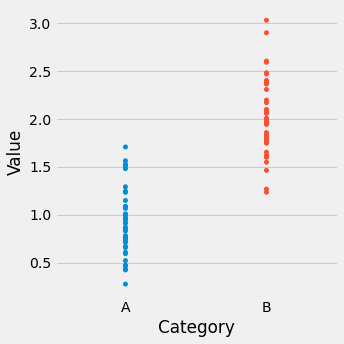

In [3]:
sns.catplot(x='Category', y='Value', jitter=False, data=df); # label the plot

### T-Test

Running a t-test in Python is done with a single cell function call. You **can use Scipy or Statsmodels.**

Chances are very slim you will have to perform a t-test in your employment, we are just looking at the mechanics of it, in terms of programming.

How to perform a T-Test in Python.

The test is testing to see what the probabilty that the two lists of numbers, had the same mean. We can see that the probabiliy is 0 for seeing the A values around the B values.

In [4]:
# The scipy.stats version.
# Here we ask what is the prob that numbers in A list, and numbers in B list, are bunched around dame point. 
t_ss, p_ss = ss.ttest_ind(a, b)
# prints out p value from scipy.ttest_ind(the functioning), takes two parameters a&b.
# returns two values, t_ss is the 0, and p_ss is .00. Typically interested in the p value.
print(f"P_scipy: {p_ss:0.2f}")

P_scipy: 0.00


In [5]:

# test statistic, pvalue of the t-test, degrees of freedom used in the t-test
t, p, d = stat.ttest_ind(a, b)
print(f"P: {p:0.2f}")

P: 0.00


We have now run a test to show us that our A values are different, which it shows on the plot, but we now have efficient evidence from the function above that shows us the values are different.

**If we change m_b above from 2.0 to 1.0, we will see an increased change that both values are centered around the same point.**

### Visualisation

t-tests perform calculations on samples from two populations to test whether the populations are likely similar.

In the real world, we only see the samples and we cannot see the populations.

Looking as the results of a t-test. 

- Blue curve represents the A values, which are bunched around 1. Very likely to see numbers around 1, and less likely to see numbers beyond 2 on the Y axis and below 0.
- Red curve represents values B all bunched around 2. Very likely to see numbers around 2.
- The question that the T-Test asks is, are the tips of the blue curve and the red curve at the same point or not?
- We know that they are not, because we created a fake data set. m_a was 1, and m_b was 2. 

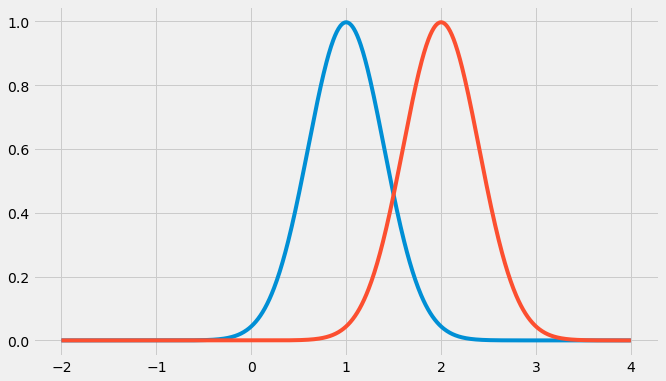

In [6]:
x = np.linspace(-2.0, 4.0, 1000)

y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

### Critical values
The critical value is used to make a decision regarding the calculation of the $t$ statistic from the samples.

If the probability of seeing such a $t$ value given the hypothesis that there is no difference between the means, then data is suggesting that you should reject that hypothesis.

**How the T-Test makes it's decision.**

If the Blue curve and the red curves centre point were both at the same, what is the chance/probability all the values could be down near the X axis. 
- We can see from the plot below, that the probability is really low that we will see a large number of values in the red shaded area on the plot. The majority will be -2 to +2.



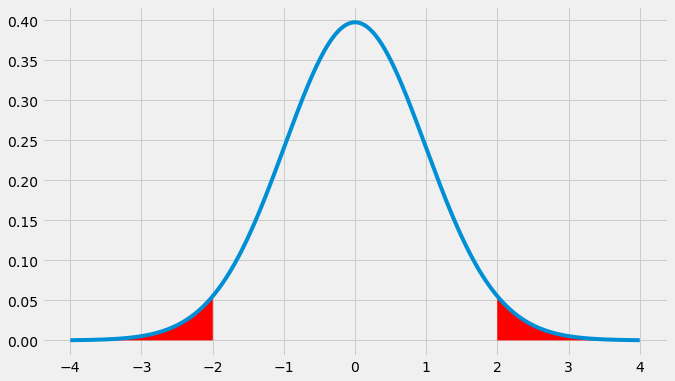

In [7]:
x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d)
tf = pd.DataFrame({'x': x_t, 't': t})

tcrit = abs(ss.t.ppf(0.025, d))
one = tf[tf['x'] >= tcrit]
two = tf[tf['x'] <= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor="red")
ax.fill_between(two['x'], two['t'], 0, facecolor="red")

plt.show()

### Type I errors - False Positives


How do they occur?

A type 1 error is also known as a false positive and occurs when a researcher incorrectly rejects a true null hypothesis. This means that your report that your findings are significant when in fact they have occurred by chance.

The probability of making a type I error is represented by your alpha level (α), which is the p-value below which you reject the null hypothesis. A p-value of 0.05 indicates that you are willing to accept a 5% chance that you are wrong when you reject the null hypothesis.

You can reduce your risk of committing a type I error by using a lower value for p. For example, a p-value of 0.01 would mean there is a 1% chance of committing a Type I error.

However, using a lower value for alpha means that you will be less likely to detect a true difference if one really exists (thus risking a type II error).

Video explaining both eerors: https://www.youtube.com/watch?v=Hdbbx7DIweQ&feature=emb_logo

Statistical test try and manage the error, to quantify it in some way. 

- Below we will gen A vales and B values, where a and b have the same average value, so they have the same centre point.
- If we run 10k t-tests, gen new a and b values each time, keepig the 2 underlying curves the same, so they do coincide. 
- It should not suggest that the curves are not the same. 
- We will give it a 5% chance of saying that they are different. 
- False positives, we decide what we want built in, different from flase negatives.
- So, 5% of the time, even though the two curves coinicide, 2.0 and 2.0 we gave it, the data is suggecting that they are not the same. Can change it out to 0.0000001 when you know there is little chance that it can be different. 
- If you change below to 2.0 and 3.0, it will output 100% of the time they are different.

In [8]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= 0.05: # this called false positives, giving it 5% chance that it is wrong. 
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

5.03%


### Type 2 errors - False Negatives

How do they occur?

A type II error is also known as a false negative and occurs when a researcher fails to reject a null hypothesis which is really false. Here a researcher concludes there is not a significant effect, when actually there really is.

The probability of making a type II error is called Beta (β), and this is related to the power of the statistical test (power = 1- β). You can decrease your risk of committing a type II error by ensuring your test has enough power.

You can do this by ensuring your sample size is large enough to detect a practical difference when one truly exists.

- Harder to calculate, depend on difference between the two values, the mean, 2.0 and 2.1. 
- if we change it from 2.0 and 2.1 to, 2.0 and 3.0 it will give us 100% chance of being different.



In [9]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

35.20%


### Paired Samples

Refernces for this section:

https://vincentarelbundock.github.io/Rdatasets/articles/data.html

https://uc-r.github.io/t_test 

Read in below csv from website above.

In [10]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


Take group 1 from df. 

In [11]:
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

Take group 2.

In [12]:
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

Do t-test. 

In [13]:
ss.ttest_rel(drugA, drugB) # tests if there is a diff between drug a and drug b.
# p value diff of .0028

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

Can do another type of t-test. take drug b away from drug a, and is average 0? 

In [14]:
ss.ttest_1samp(drugB - drugA, 0)


Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

And can do it using the stats model package, instead of Scipy package. 

In [15]:
stat.DescrStatsW(drugB - drugA).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)

### Samples and populations

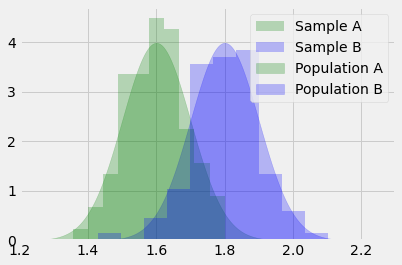

In [16]:
# Set parameters for two populations.
popA = {'m': 1.6, 's': 0.1}
popB = {'m': 1.8, 's': 0.1}

# Create two samples, one from each population.
sampA = np.random.normal(popA['m'], popA['s'], 100)
sampB = np.random.normal(popB['m'], popB['s'], 100)

# x values for plotting.
x = np.linspace(1.25, 2.25, 1000)

# The probability density functions (PDFs) for the two populations.
pdfA = ss.norm.pdf(x, popA['m'], popA['s'])
pdfB = ss.norm.pdf(x, popB['m'], popB['s'])

# Plot the population PDFs as shaded regions.
plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(sampB, density=True, color='b', alpha=0.25, label="Sample B")

# Display a legend.
plt.legend()
plt.show()


Above we have two curves displayed with two histograms in the background. **What if we want to display more than two samples?**

### Problems with multiple t-tests

Suppose we want to compare three groups. Can three t-tests be run in parallel?



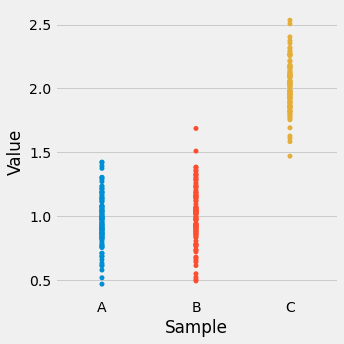

In [18]:
# Size of each sample.
N = 100

# Create three samples.
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

# Put samples in a single data frame.
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples.
sns.catplot(x='Sample', y='Value', jitter=False, data=dfsamps);

### Now we run three different t-tests.

We can see that there is an 88% chance that the data from A and B poplulation are the same. We would not reject NULL hypothesis here. 

In [19]:
# t-Tests
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f}\tp_AC: {p_AC:.2f}\tp_BC: {p_BC:.2f}")

p_AB: 0.18	p_AC: 0.00	p_BC: 0.00


**Even if we have the population size the same now, all centered around 1, we are still getting a false positivity rate of around 10%.**

You increasing your chances of getting an error by repeating, or performing a number of t-tests one after another.

**You can get around this by using the Anova test.**

In [20]:
# Let's run 1000 tests, remembering our Type I errors.

falsepos = 0

for i in range(1000):
    A = np.random.normal(1.0, 0.2, N)
    B = np.random.normal(1.0, 0.2, N)
    C = np.random.normal(1.0, 0.2, N)
    t_AB, p_AB = ss.ttest_ind(A, B)
    t_AC, p_AC = ss.ttest_ind(A, C)
    t_BC, p_BC = ss.ttest_ind(A, C)
    if p_AB <= 0.05 or p_AC <= 0.05 or p_BC <= 0.05:
        falsepos = falsepos + 1

print(f"False positive rate: {falsepos / 10}%")

False positive rate: 9.0%


### Analaysis of Variance (ANOVA)

ANOVA can be used to avoid a higher Type I error rate.

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

**Here we can see that we will have a 0% flase positivity rate when we run them all centered around the same value, unlike above.**

In [22]:
# still a t-test, just use f (f_oneway) 
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"False positive rate: {P:.2f}")

False positive rate: 0.00


### Pull another dataset and do the same as above from: https://vincentarelbundock.github.io/Rdatasets/articles/data.html

### Bibliography

https://www.investopedia.com/terms/t/t-test.asp#:~:text=A%20t%2Dtest%20is%20a,be%20related%20in%20certain%20features.&text=A%20t%2Dtest%20is%20used,assumption%20applicable%20to%20a%20population.

https://www.simplypsychology.org/type_I_and_type_II_errors.html#:~:text=A%20type%20II%20error%20is,hypothesis%20which%20is%20really%20false.&text=The%20probability%20of%20making%20a%20type%20II%20error%20is%20called,power%20%3D%201%2D%20%CE%B2).
